# Homework2 - datatalks.club - Rui Pinto

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Load the data
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  291k  100  291k    0     0  2784k      0 --:--:-- --:--:-- --:--:-- 2886k


In [213]:
df = pd.read_csv('laptops.csv')

df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [214]:
# Preparing the dataset
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

df.columns, df.shape

(Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
        'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
       dtype='object'),
 (2160, 12))

## Question 1
There's one column with missing values. What is it?

'ram'
'storage'
'screen'
'final_price'

In [215]:
df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             4
touch              0
final_price        0
dtype: int64

In [216]:
print(f"The column with missing values are: {df.columns[df.isnull().any()].tolist()}") # screen

The column with missing values are: ['storage_type', 'gpu', 'screen']


## Question 2
What's the median (50% percentile) for variable 'ram'?

In [217]:
df['ram'].median()

16.0

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

note: Use the same code as in the lectures

In [218]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [219]:
n_val, n_test, n_train

(432, 432, 1296)

In [220]:
idx = np.arange(n)

In [221]:
# Shuffle the indices
np.random.seed(42)
np.random.shuffle(idx)

In [222]:
# creating train, val and test data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [223]:
# assert that the length of the dataframes are correct
assert len(df_train) + len(df_val) + len(df_test) == len(df)

In [224]:
#reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

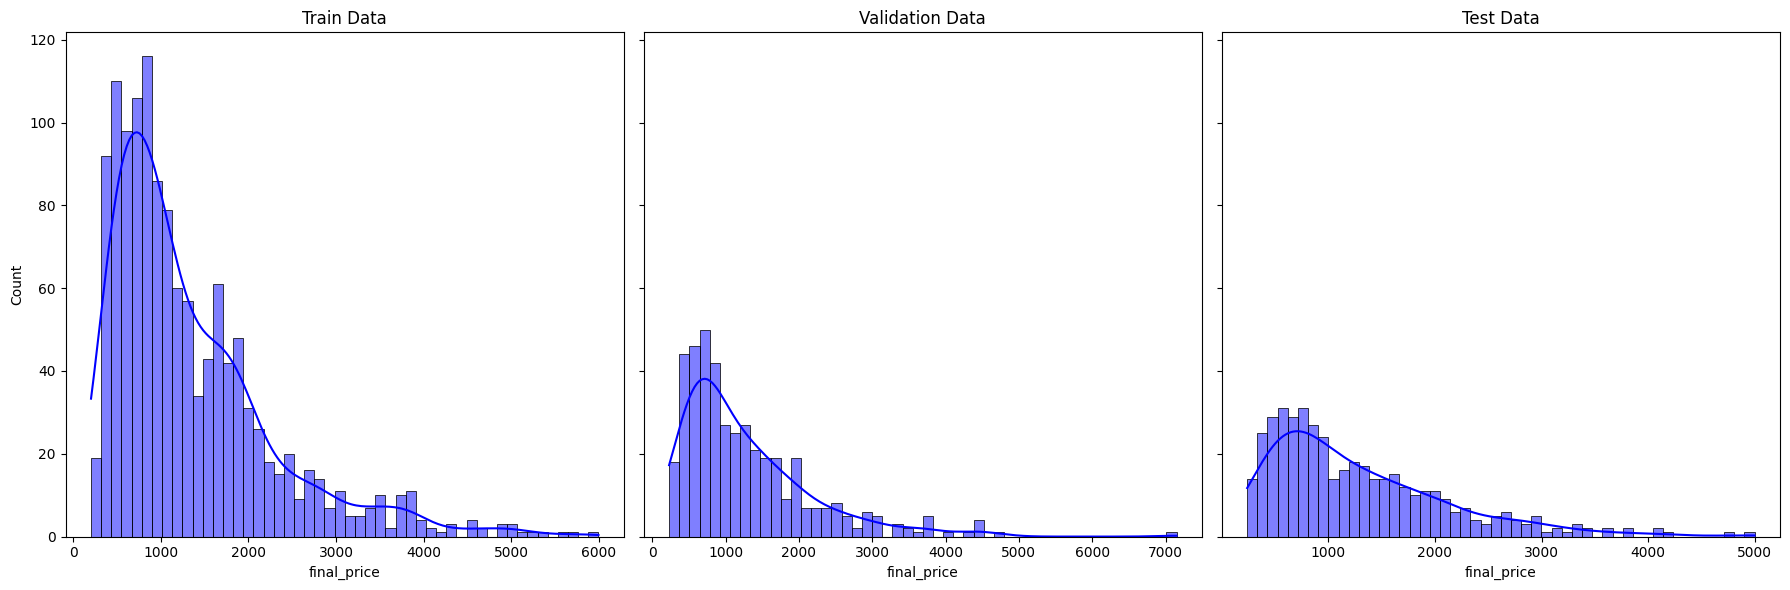

In [225]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.histplot(df_train['final_price'], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[0])
axes[0].set_title('Train Data')

sns.histplot(df_val['final_price'], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[1])
axes[1].set_title('Validation Data')

sns.histplot(df_test['final_price'], bins=50, color='blue', alpha=0.5, kde=True, ax=axes[2])
axes[2].set_title('Test Data')

plt.tight_layout()
plt.show()

In [226]:
# exercise solution does not want me to apply log transformations to price

y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

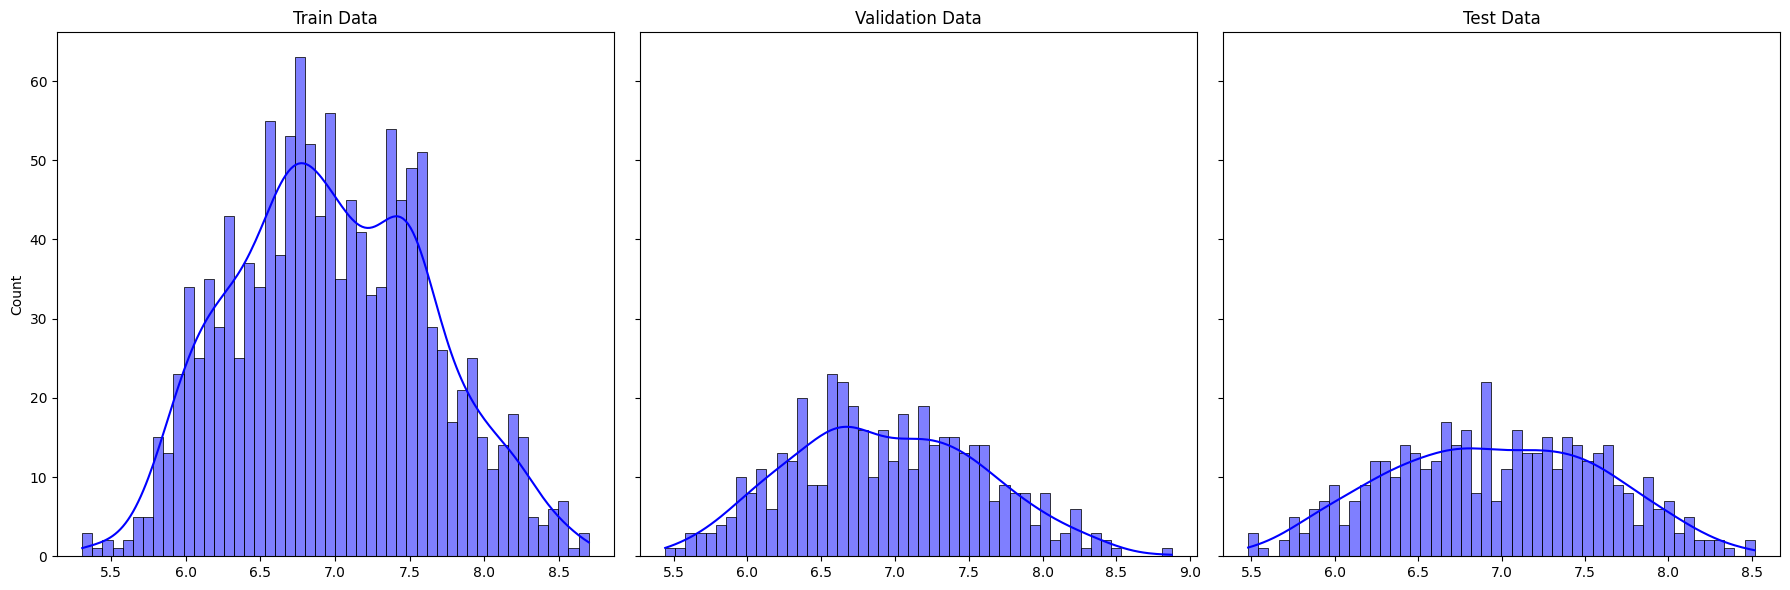

In [227]:
#log transformation for final_price just to see its distribution
y_train_log = np.log1p(df_train['final_price'].values)
y_val_log = np.log1p(df_val['final_price'].values)
y_test_log = np.log1p(df_test['final_price'].values)

# after log transformation
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.histplot(y_train_log, bins=50, color='blue', alpha=0.5, kde=True, ax=axes[0])
axes[0].set_title('Train Data')

sns.histplot(y_val_log, bins=50, color='blue', alpha=0.5, kde=True, ax=axes[1])
axes[1].set_title('Validation Data')

sns.histplot(y_test_log, bins=50, color='blue', alpha=0.5, kde=True, ax=axes[2])
axes[2].set_title('Test Data')

plt.tight_layout()
plt.show()

In [228]:
# deleting target from df
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [229]:
#checking length of the dataframes
assert len(df_train) + len(df_val) + len(df_test) == len(df)
assert len(y_train) + len(y_val) + len(y_test) == len(df)

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [230]:
#columns with NaN values in numerical columns
df_train.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch'],
      dtype='object')

In [231]:
df_train.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
dtype: object

In [232]:
# numerical columns
base = df_train.select_dtypes(include=[np.number]).columns.tolist()

# numerical columns with missing values
df_train[base].isna().sum()

ram        0
storage    0
screen     3
dtype: int64

In [233]:
df_train.nunique()

laptop          1296
status             2
brand             25
model            113
cpu               24
ram                9
storage           11
storage_type       2
gpu               38
screen            28
touch              2
dtype: int64

In [234]:
# function that train a linear regression model from code lesson
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # creating a column of ones
    X = np.column_stack([ones, X]) # adding the column of ones to the X matrix

    XTX = X.T.dot(X) # calculating the dot product of X and X transpose
    XTX_inv = np.linalg.inv(XTX) # calculating the inverse of the dot product
    w_full = XTX_inv.dot(X.T).dot(y) # 
    
    return w_full[0], w_full[1:]

In [235]:
# function to prepare the data

def prepare_X(df,option=0):
    df = df.copy()
    
    df_num = df[base]
    
    if option == 'mean':
        df_num = df_num.fillna(df_num['screen'].mean())
    else:
        df_num = df_num.fillna(0)
        
    X = df_num.values
    
    return X

In [236]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [237]:
# mean option
X_train_mean = prepare_X(df_train, option='mean')
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

print(f"The bias term is: {w0_mean}")
print(f"The weights are: {w_mean}")

The bias term is: 808.9159907333465
The weights are: [ 43.90774584   0.87135236 -45.18273312]


In [238]:
# zero option
X_train_zero = prepare_X(df_train, option='zero')
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

print(f"The bias term is: {w0_zero}")
print(f"The weights are: {w_zero}")

The bias term is: 676.8954853003862
The weights are: [ 43.70681555   0.86506867 -36.10399833]


In [239]:
# predict X_val with mean values
X_val_mean = prepare_X(df_val, option='mean')
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# predict X_val with zeros
X_val_zero = prepare_X(df_val)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

# calculate the RMSE for both predictions
rmse_mean = round(rmse(y_val, y_pred_mean),2)
rmse_zero = round(rmse(y_val, y_pred_zero),2)

if rmse_mean < rmse_zero:
    print(f"Mean values are better. RMSE: {rmse_mean}")
elif rmse_mean > rmse_zero:
    print(f"Zero values are better. RMSE: {rmse_zero}")
else:
    print(f"Both are equal. RMSE: {rmse_mean}")
    

Zero values are better. RMSE: 597.36


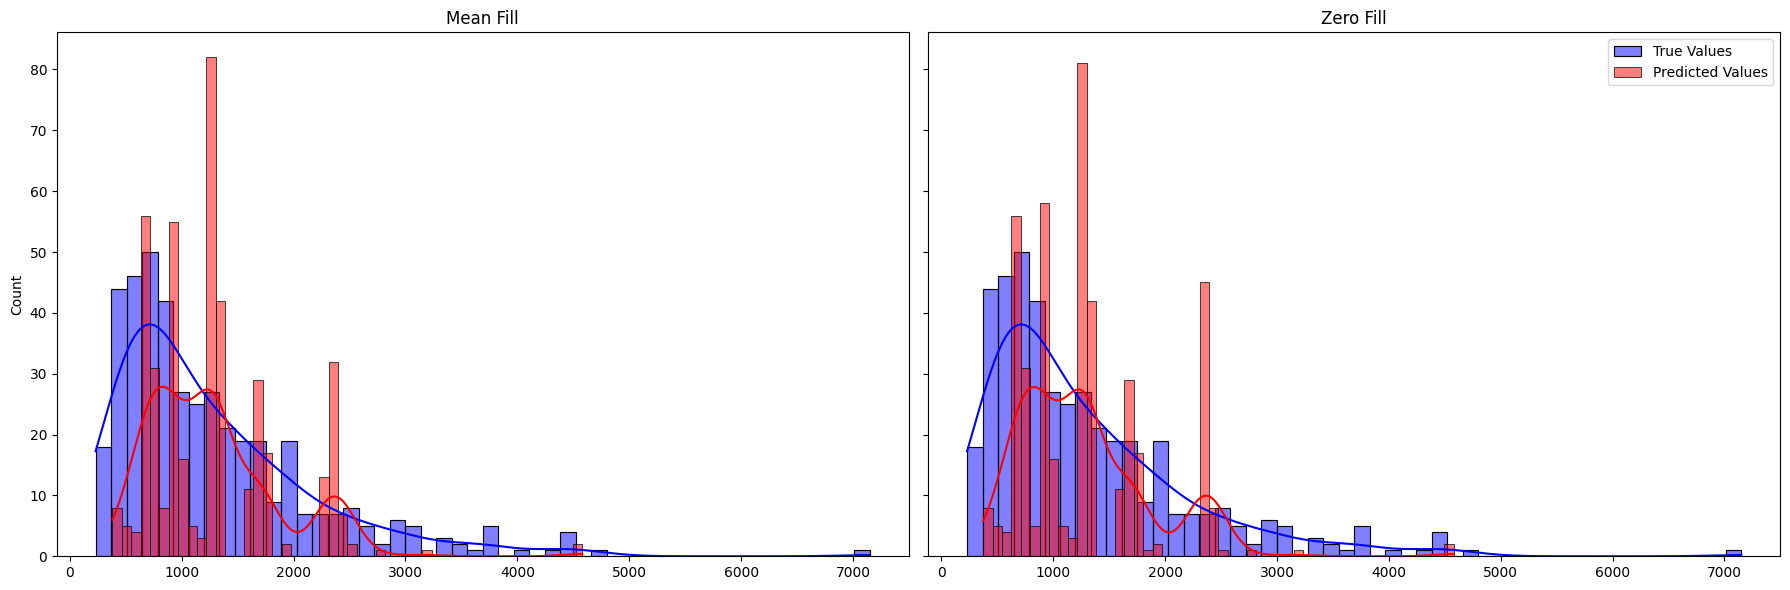

In [244]:
#plot side by side the graphs
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.histplot(y_val, bins=50, color='blue', alpha=0.5, kde=True, ax=axes[0], label='True Values')
sns.histplot(y_pred_mean, bins=50, color='red', alpha=0.5, kde=True, ax=axes[0], label='Predicted Values')
axes[0].set_title('Mean Fill')

sns.histplot(y_val, bins=50, color='blue', alpha=0.5, kde=True, ax=axes[1], label='True Values')
sns.histplot(y_pred_zero, bins=50, color='red', alpha=0.5, kde=True, ax=axes[1], label='Predicted Values')
axes[1].set_title('Zero Fill')

# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [204]:
# function that train a linear regression model from code lesson with regularization
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0]) # creating a column of ones
    X = np.column_stack([ones, X]) # adding the column of ones to the X matrix

    XTX = X.T.dot(X) # calculating the dot product of X and X transpose
    
    #-----------------------------------------------------------------
    XTX = XTX + r * np.eye(XTX.shape[0]) # adding the regularization term
    #-----------------------------------------------------------------
    
    XTX_inv = np.linalg.inv(XTX) # calculating the inverse of the dot product
    w_full = XTX_inv.dot(X.T).dot(y) # calculating the weights (weights = XtX_inv * Xt * y)
    
    return w_full[0], w_full[1:]

In [205]:
values_of_r = [0, 0.01, 0.1, 1, 10, 100]

X_train = prepare_X(df_train)
rmse_values = {}

for r in values_of_r:
    w0_reg, w_reg = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred_reg = w0_reg + X_val_zero.dot(w_reg)
    rmse_reg = round(rmse(y_val, y_pred_reg), 2)
    rmse_values[r] = rmse_reg
    print(f"RMSE for r={r}: {rmse_reg}")

best_r = min(rmse_values, key=rmse_values.get)
print(f"\nBest RMSE is {rmse_values[best_r]} for r={best_r}")

RMSE for r=0: 597.36
RMSE for r=0.01: 597.36
RMSE for r=0.1: 597.35
RMSE for r=1: 597.21
RMSE for r=10: 597.06
RMSE for r=100: 597.9

Best RMSE is 597.06 for r=10


## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

```  
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

```

In [206]:
list_of_seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_values_seeds = {}

for seed in list_of_seeds:
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train) #without regularization
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_reg = round(rmse(y_val, y_pred), 2)
    
    #saving the rmse for each seed
    rmse_values_seeds[seed] = rmse_reg
    
    print(f"Seed: {seed}, RMSE: {rmse_reg}")
    
#computing the standard deviation of the rmse values
std_rmse = round(np.std(list(rmse_values_seeds.values())),3)

print(f"\nStandard deviation of the RMSE values: {std_rmse}")
    

Seed: 0, RMSE: 650.09
Seed: 1, RMSE: 610.85
Seed: 2, RMSE: 554.12
Seed: 3, RMSE: 584.52
Seed: 4, RMSE: 582.52
Seed: 5, RMSE: 623.52
Seed: 6, RMSE: 608.45
Seed: 7, RMSE: 563.1
Seed: 8, RMSE: 574.91
Seed: 9, RMSE: 591.61

Standard deviation of the RMSE values: 27.651


## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [207]:
print(f"Current seed is: {seed}")

Current seed is: 9


In [208]:
df_train_val = pd.concat([df_train, df_val])
df_train_val =df_train_val.reset_index(drop=True)
y_train_val = np.concatenate([y_train, y_val])

X_train_val = prepare_X(df_train_val)
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

In [209]:
X_test = prepare_X(df_test)
y_pred_new = w0 + X_test.dot(w)
rmse_test = round(rmse(y_test, y_pred_new), 2)
print(f"RMSE: {rmse_reg}")

RMSE: 591.61


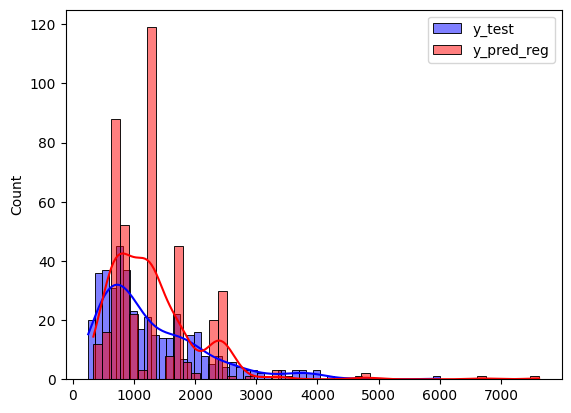

In [210]:
# Plot the histograms
sns.histplot(y_test, bins=50, color='blue', alpha=0.5, kde=True, label='y_test')
sns.histplot(y_pred_new, bins=50, color='red', alpha=0.5, kde=True, label='y_pred_reg')

# Add the legend
plt.legend()

# Show the plot
plt.show()
